# Implémentation de la régression logistique from scratch

In [193]:
# First of all let's import the libraries that we are going to use 
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


In [194]:
# Let's start by observing the data we have in our dataset
#we are going to use the cat vs noncat database which is already separated in test and train set

with h5py.File('catvsnoncat/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x = np.array(train_dataset["train_set_x"][:])
        train_set_y = np.array(train_dataset["train_set_y"][:])

with h5py.File('catvsnoncat/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x = np.array(test_dataset["test_set_x"][:])
        test_set_y = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])
print(classes)

[b'non-cat' b'cat']


0


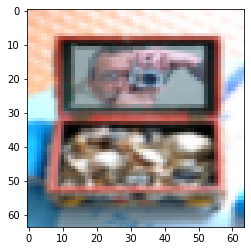

In [195]:
# Let's see what we have in our dataset
plt.imshow(train_set_x[15])
print(train_set_y[15])


1


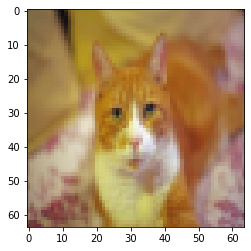

In [196]:
plt.imshow(train_set_x[24])
print(train_set_y[24])

#Our database contains images of cats with the value 1 and images of other things which have the value 0

In [197]:
# the output are a single line vector, i'll just reshape them just to prevent some complications
train_set_y = train_set_y.reshape(1,train_set_y.shape[0])
test_set_y = test_set_y.reshape(1,test_set_y.shape[0])
train_set_y.shape



(1, 209)

In [198]:
test_set_y.shape

(1, 50)

In [199]:
#Let's see the dimensions for our input values
print(test_set_x.shape)
print(train_set_x.shape)

(50, 64, 64, 3)
(209, 64, 64, 3)


In [200]:
#Now we are going to flatten the input images it will make them easier to manage, we need to reshape them into 64*64*3 images 
test_set_x_new = test_set_x.reshape(64*64*3,test_set_x.shape[0])
test_set_x_new.shape
train_set_x_new = train_set_x.reshape(64*64*3,train_set_x.shape[0])
train_set_x_new.shape

(12288, 209)

In [201]:
#Next in our code we are going to use the softmax function, in order to prevent data overflow i will divide the input values by
# 255
test_set_x = test_set_x_new/255
train_set_x = train_set_x_new/255

In [202]:
#creation of our own softmax function
def softmax(v):
    return(((np.exp(v).T)/(np.exp(v).sum(axis = 1))).T)

In [203]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [204]:
# Now i'm going to initialize the parameters i'm going to use for 
# Update : in the beginning i initialized the vector b some random values but it would cause some problems so finally i decided to 
# to initialize it to zeros in order to prevent such errors
def initialization(dim):
    #I'm creating the vector flat but i will reshape it later 
    w = np.zeros((dim,1))
    b = 0
    
    return w,b

In [205]:
w,b = initialization(64*64*3)


In [206]:
# Now one of the most important parts of the creation of a deep learning model : the forward propagation
# Now we are going to do a scalar multiplication between our weight created with initialization() function and our train set

def forward_propagation(X,Y,w,b) : 
    m = X.shape[1]
    
    # i added an epsilon scalar to prevent divide by zero log errors from occuring
    epsilon = 1e-5
    vect = np.dot(w.T,X) + b
    vect = sigmoid(vect)
    #Test1: print("dimension du vect:",vect.shape)
    # The cost function we are going to use :
    
    
    cost = -1/m*np.sum(Y * np.log(vect + epsilon ) + (1 - Y) * (np.log(1 - vect + epsilon )))
    
    # Later we will need to reduce the cost doing a gradiant descent so we are going to compute the derivative now and keep it
    # for later
    
    dw = (1 / m) * np.dot(X, (vect - Y).T)
    # TEST2: print(X.shape)
    # TEST3: print(((vect - Y).T).shape)
    db = 1/m*np.sum( vect - Y )
    
    grads = {"dw" : dw, "db": db}
    
    return cost, grads

In [207]:
softmax(np.dot(w.T,train_set_x))


array([[0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00478469, 0.00478469,
        0.00478469, 0.00478469, 0.00478469, 0.00

In [208]:
#so this function will compute the cost function and also return a dictionary containing the derivative for x coordinates
cost,grads = forward_propagation(train_set_x,train_set_y,w,b)

In [209]:
def gradient_descent(X,Y,w,b,number,learning_rate):
    
    costs = []
    #We need new grads each time we do the gradient descent and reuse forward propagation
    for i in range(number):
        cost, grads = forward_propagation(X,Y,w,b)
        dw = grads["dw"]
        db = grads["db"]
        w -= dw*learning_rate
        b -= db * learning_rate 
        costs.append(cost)
        
        # add the cost to the costs list every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
        
        # print the cost every 100 iterations
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,"b": b}
    
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs
        

In [210]:
#Test to check if the gradiant descent works well
gradient_descent(train_set_x,train_set_y,w,b,3,0.1)

Cost after iteration 0: 0.693127


({'w': array([[-0.00698846],
         [-0.00856741],
         [-0.00952997],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]]),
  'b': -0.046650717703349304},
 {'dw': array([[0.10182944],
         [0.11117366],
         [0.1160334 ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]),
  'db': 0.6555023923444976},
 [0.6931271807599427,
  0.6931271807599427,
  3.9661687247995876,
  7.54674674021302])

In [211]:
# now we are going to compute the function that will show us if our program predicts well and how many mistakes it makes
def prediction(X,w,b):
    l = X.shape[1]
    y_prediction = np.zeros((1,l))
    vect = np.dot(w.T,X) + b
    vect = sigmoid(vect)
    print("vect :",vect)
    
    for i in range(vect.shape[1]):
        if vect[0,i]<=0.5:
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    print(y_prediction.shape)
    return y_prediction


In [212]:
prediction(train_set_x,w,b)

vect : [[1.51268787e-49 6.43663860e-50 5.34385531e-49 9.04536318e-50
  4.82831707e-50 4.32652303e-49 6.45126399e-50 4.01283396e-50
  3.49571025e-49 5.49988004e-50 4.23604416e-50 3.09625323e-49
  5.06318639e-50 3.83297695e-50 4.02017564e-49 6.58864364e-50
  4.82973766e-50 5.23354648e-49 7.66212066e-50 6.07156233e-50
  6.10529937e-49 9.94708419e-50 7.62129035e-50 7.10061208e-49
  1.56819214e-49 9.05256588e-50 9.02089317e-49 2.43468030e-49
  1.14933413e-49 9.84758848e-49 2.44449823e-49 1.45966760e-49
  1.11261671e-48 2.56893631e-49 1.48413876e-49 1.04756615e-48
  2.66362411e-49 1.47051900e-49 1.28908039e-48 3.85425226e-49
  2.14015905e-49 1.97639722e-48 5.44772091e-49 2.68880203e-49
  2.72922232e-48 7.19155366e-49 2.91105331e-49 3.30640902e-48
  1.18125751e-48 3.44757979e-49 4.04432897e-48 1.15955452e-48
  3.40305070e-49 5.18588479e-48 1.40841086e-48 4.92981589e-49
  6.73175659e-48 2.47074227e-48 8.84715614e-49 9.83741053e-48
  3.20940289e-48 1.17453210e-48 9.31077732e-48 1.82251374e-48
 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [213]:
# Now for the final part we are going to add all of these steps into one part

def model_prediction(X_train,Y_train,X_test,Y_test,learning_rate,number):
    #First of all let's start by creating our parameters
    w,b = initialization(X_train.shape[0])
    
    #Now let's compute and try to reduce the cost
    parameters, grads, costs = gradient_descent(X_train, Y_train,w,b, number, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = prediction(X_test,w, b)
    Y_prediction_train = prediction(X_train,w, b)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    
    
    #
    
    return 1
    

In [214]:
model_prediction(train_set_x,train_set_y,test_set_x,test_set_y,0.05,4000)

Cost after iteration 0: 0.693127
Cost after iteration 100: 5.660033
Cost after iteration 200: 3.951123
Cost after iteration 300: 3.960859
Cost after iteration 400: 2.527842
Cost after iteration 500: 3.965337
Cost after iteration 600: 4.024611
Cost after iteration 700: 1.035026
Cost after iteration 800: 1.261068
Cost after iteration 900: 0.897991
Cost after iteration 1000: 4.110179
Cost after iteration 1100: 3.935640
Cost after iteration 1200: 3.853151
Cost after iteration 1300: 3.278808
Cost after iteration 1400: 3.150715
Cost after iteration 1500: 3.050615
Cost after iteration 1600: 2.956782
Cost after iteration 1700: 2.860662
Cost after iteration 1800: 2.774762
Cost after iteration 1900: 2.694658
Cost after iteration 2000: 2.613219
Cost after iteration 2100: 2.522493
Cost after iteration 2200: 2.416745
Cost after iteration 2300: 2.294873
Cost after iteration 2400: 0.369417
Cost after iteration 2500: 2.429926
Cost after iteration 2600: 0.369662
Cost after iteration 2700: 2.328344
Cost

1